This notebook produces the plots for the Supplementary Material of the photon noise paper.

In [1]:
import pandas as pd
from kid_readout.analysis import archive, dataframe, plot_dataframe

updated file list


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
bb = pd.DataFrame(np.load('broadband.npy'))
cw = pd.DataFrame(np.load('continuous-wave.npy'))
off = pd.DataFrame(np.load('compressor_off.npy')).iloc[0]  # off is a pd.Series

In [3]:
def common(df, key):
    s = set(df[key])
    if len(s) > 1:
        raise ValueError("Multiple values for {}".format(key))
    else:
        return s.pop()

# Plotting

In [4]:
noise_colormap = plt.cm.RdYlBu_r
cw_color = 'darkgoldenrod'
bb_color = 'darkgreen'
cw_marker = 's'
bb_marker = 'o'
cw_label = "continuous-wave"  # "c-w {:.0f} GHz".format(1e-9 * cw.timestream_mmw_source_freq.iloc[0])
bb_label = "broadband"  # "bb 140-160 GHz"

Sx_scale = 1e18
noise_ylimits = (Sx_scale * 1e-19, Sx_scale * 3e-15)
noise_xlimits = (1e1, 1e4)

PA_scale = 1e12
X_scale = 1e6
PA_limits = (8e-4, 6e1)
X_limits = (1e-1, 1e3)
NEPA_limits = (1e-18, 1e-15)
PA_line = np.logspace(np.log10(PA_limits[0]), np.log10(PA_limits[1]), 1e3) / PA_scale
to_aWrtHz = 1e18

In [5]:
mappable_cw = plt.cm.ScalarMappable(matplotlib.colors.LogNorm(min(cw.source_power), max(cw.source_power)),
                                    cmap=noise_colormap)
mappable_cw.set_array(cw.source_power)

mappable_bb = plt.cm.ScalarMappable(matplotlib.colors.LogNorm(min(bb.source_power), max(bb.source_power)),
                                    cmap=noise_colormap)
mappable_bb.set_array(bb.source_power)

In [6]:
single_channel = common(bb, 'channel')

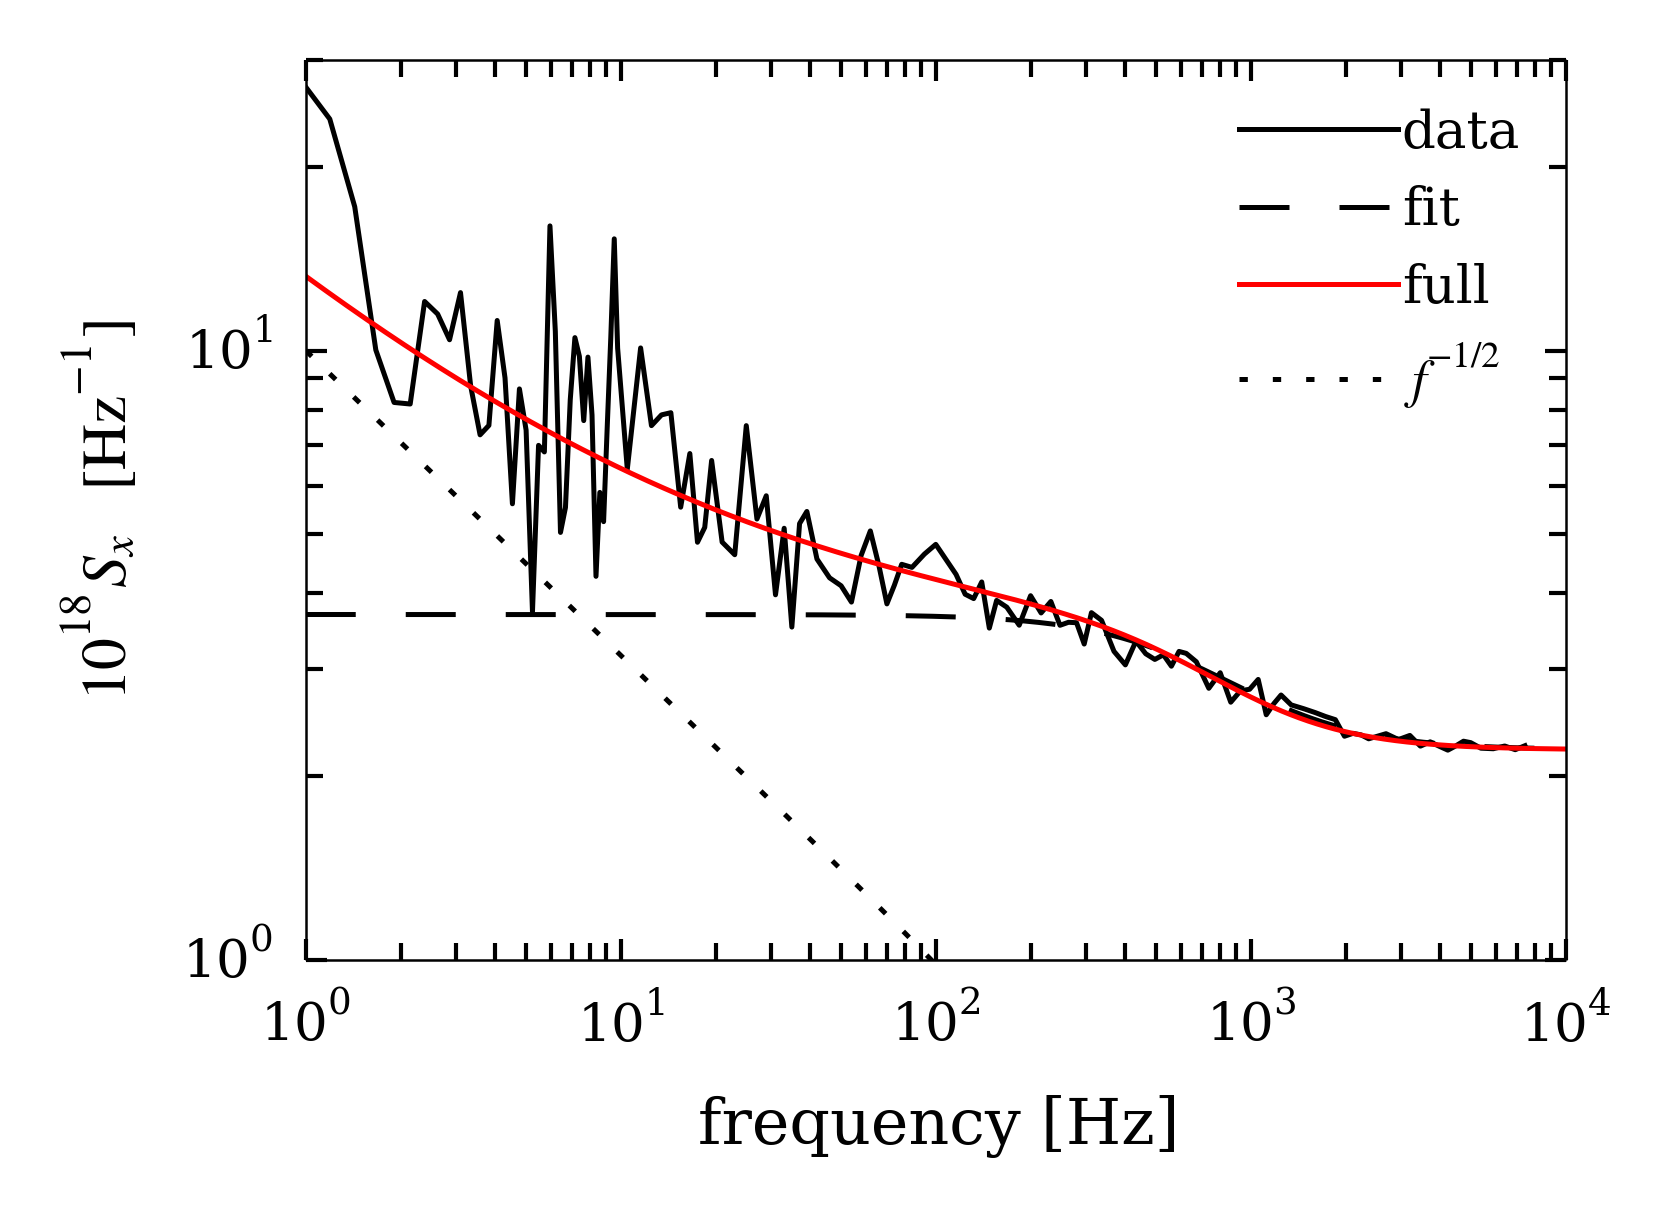

In [7]:
ff = np.logspace(0, 4, 1e3)
A_device = 0.7
A_TLS = 1e-17
S_TLS = (A_TLS * ff**(-1/2) /
       (1 + (ff / off.noise_fit_fc)**2))
#f = np.logspace(np.log10(row.pca_freq.min()), np.log10(row.pca_freq.max()), 1e3)
fig, ax = plt.subplots()

ax.loglog(off.pca_freq,
          Sx_scale * off.pca_eigvals[1],
          '-k', label='data')
ax.loglog(ff,
          Sx_scale * ((off.noise_fit_device_noise /
                      (1 + (ff / off.noise_fit_fc)**2)) +
                      off.noise_fit_amplifier_noise),
          '--k', label='fit')
ax.loglog(ff,
          Sx_scale * ((A_device * off.noise_fit_device_noise /
                      (1 + (ff / off.noise_fit_fc)**2)) +
                      off.noise_fit_amplifier_noise +
                      S_TLS),
          '-r', label='full')
ax.loglog(ff,
          Sx_scale * S_TLS,
          ':k', label='$f^{-1/2}$')

ax.set_ylabel('$10^{18} S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_xlabel('frequency [Hz]')
ax.legend(loc='upper right')
ax.set_xlim(1e0, 1e4)
ax.set_ylim(1, 30)

fig.savefig('dark_noise.pdf')
fig.savefig('dark_noise.eps')

In [8]:
cw['A_TLS'] = A_TLS * (cw.readout_power_internal / off.readout_power_internal)**(-1/2)
cw_minimum_power_row = cw[cw.source_power == cw.source_power.min()].iloc[0]
cw_maximum_power_row = cw[cw.source_power == cw.source_power.max()].iloc[0]

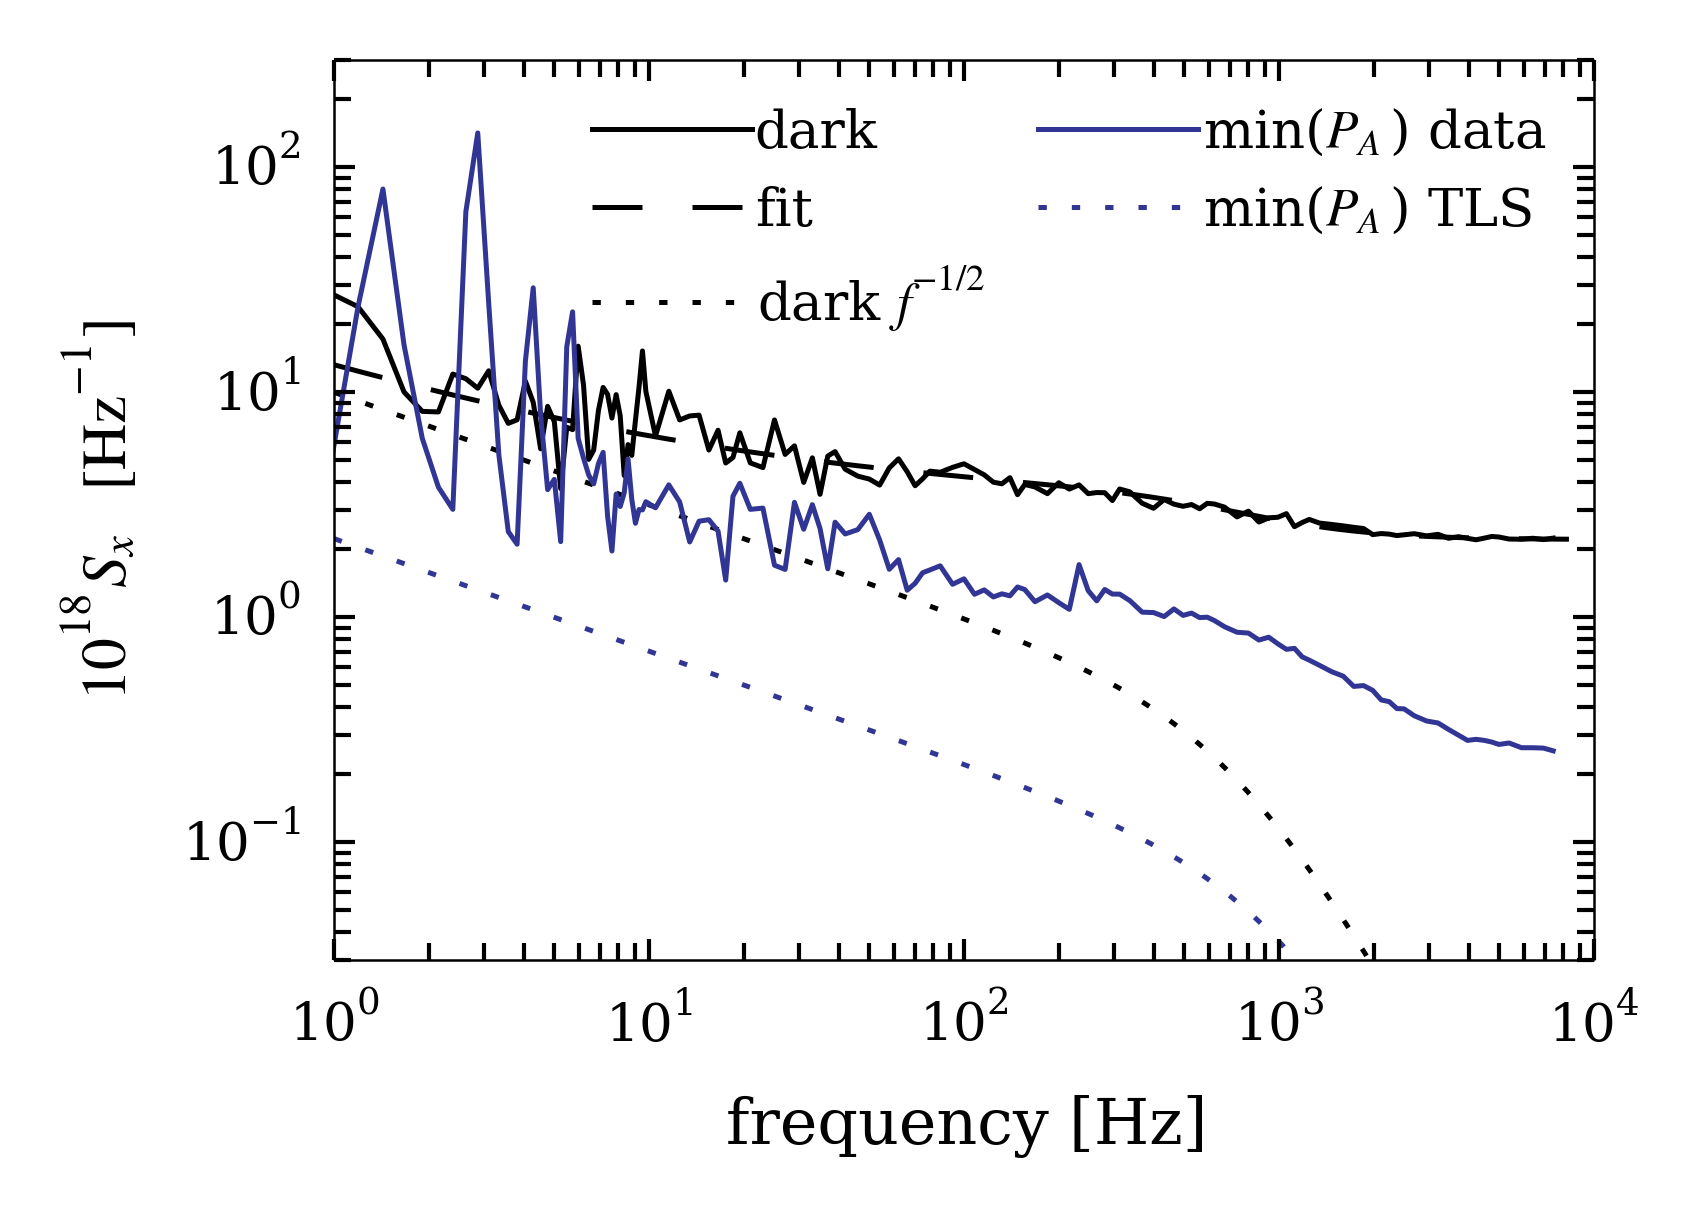

In [9]:
fig, ax = plt.subplots()

ax.loglog(off.pca_freq,
          Sx_scale * off.pca_eigvals[1],
          '-k', label='dark')
"""
ax.loglog(ff,
          Sx_scale * ((off.noise_fit_device_noise /
                      (1 + (ff / off.noise_fit_fc)**2)) +
                      off.noise_fit_amplifier_noise),
          '--k', label='fit')
"""
ax.loglog(ff,
          Sx_scale * ((A_device * off.noise_fit_device_noise /
                      (1 + (ff / off.noise_fit_fc)**2)) +
                      off.noise_fit_amplifier_noise +
                      S_TLS),
          '--k', label='fit')
ax.loglog(ff,
          Sx_scale * S_TLS,
          ':k', label='dark $f^{-1/2}$')

ax.loglog(cw_minimum_power_row.pca_freq,
          Sx_scale * cw_minimum_power_row.pca_eigvals[1],
          '-', color=mappable_cw.to_rgba(cw_minimum_power_row.source_power),
          label='min($P_A$) data')

ax.loglog(ff,
          Sx_scale * (cw_minimum_power_row.A_TLS * ff**(-1/2) /
                      (1 + (ff / cw_minimum_power_row.noise_fit_fc)**2)),
          ':', color=mappable_cw.to_rgba(cw_minimum_power_row.source_power),
          label='min($P_A$) TLS')

ax.set_ylabel('$10^{18} S_x \; [\mathrm{Hz}^{-1}]$')
ax.set_xlabel('frequency [Hz]')
ax.legend(loc='best', fontsize='xx-small', ncol=2)
ax.set_xlim(1, 1e4)
ax.set_ylim(3e-2, 3e2);

fig.savefig('dark_and_light_noise.pdf')
fig.savefig('dark_and_light_noise.eps')

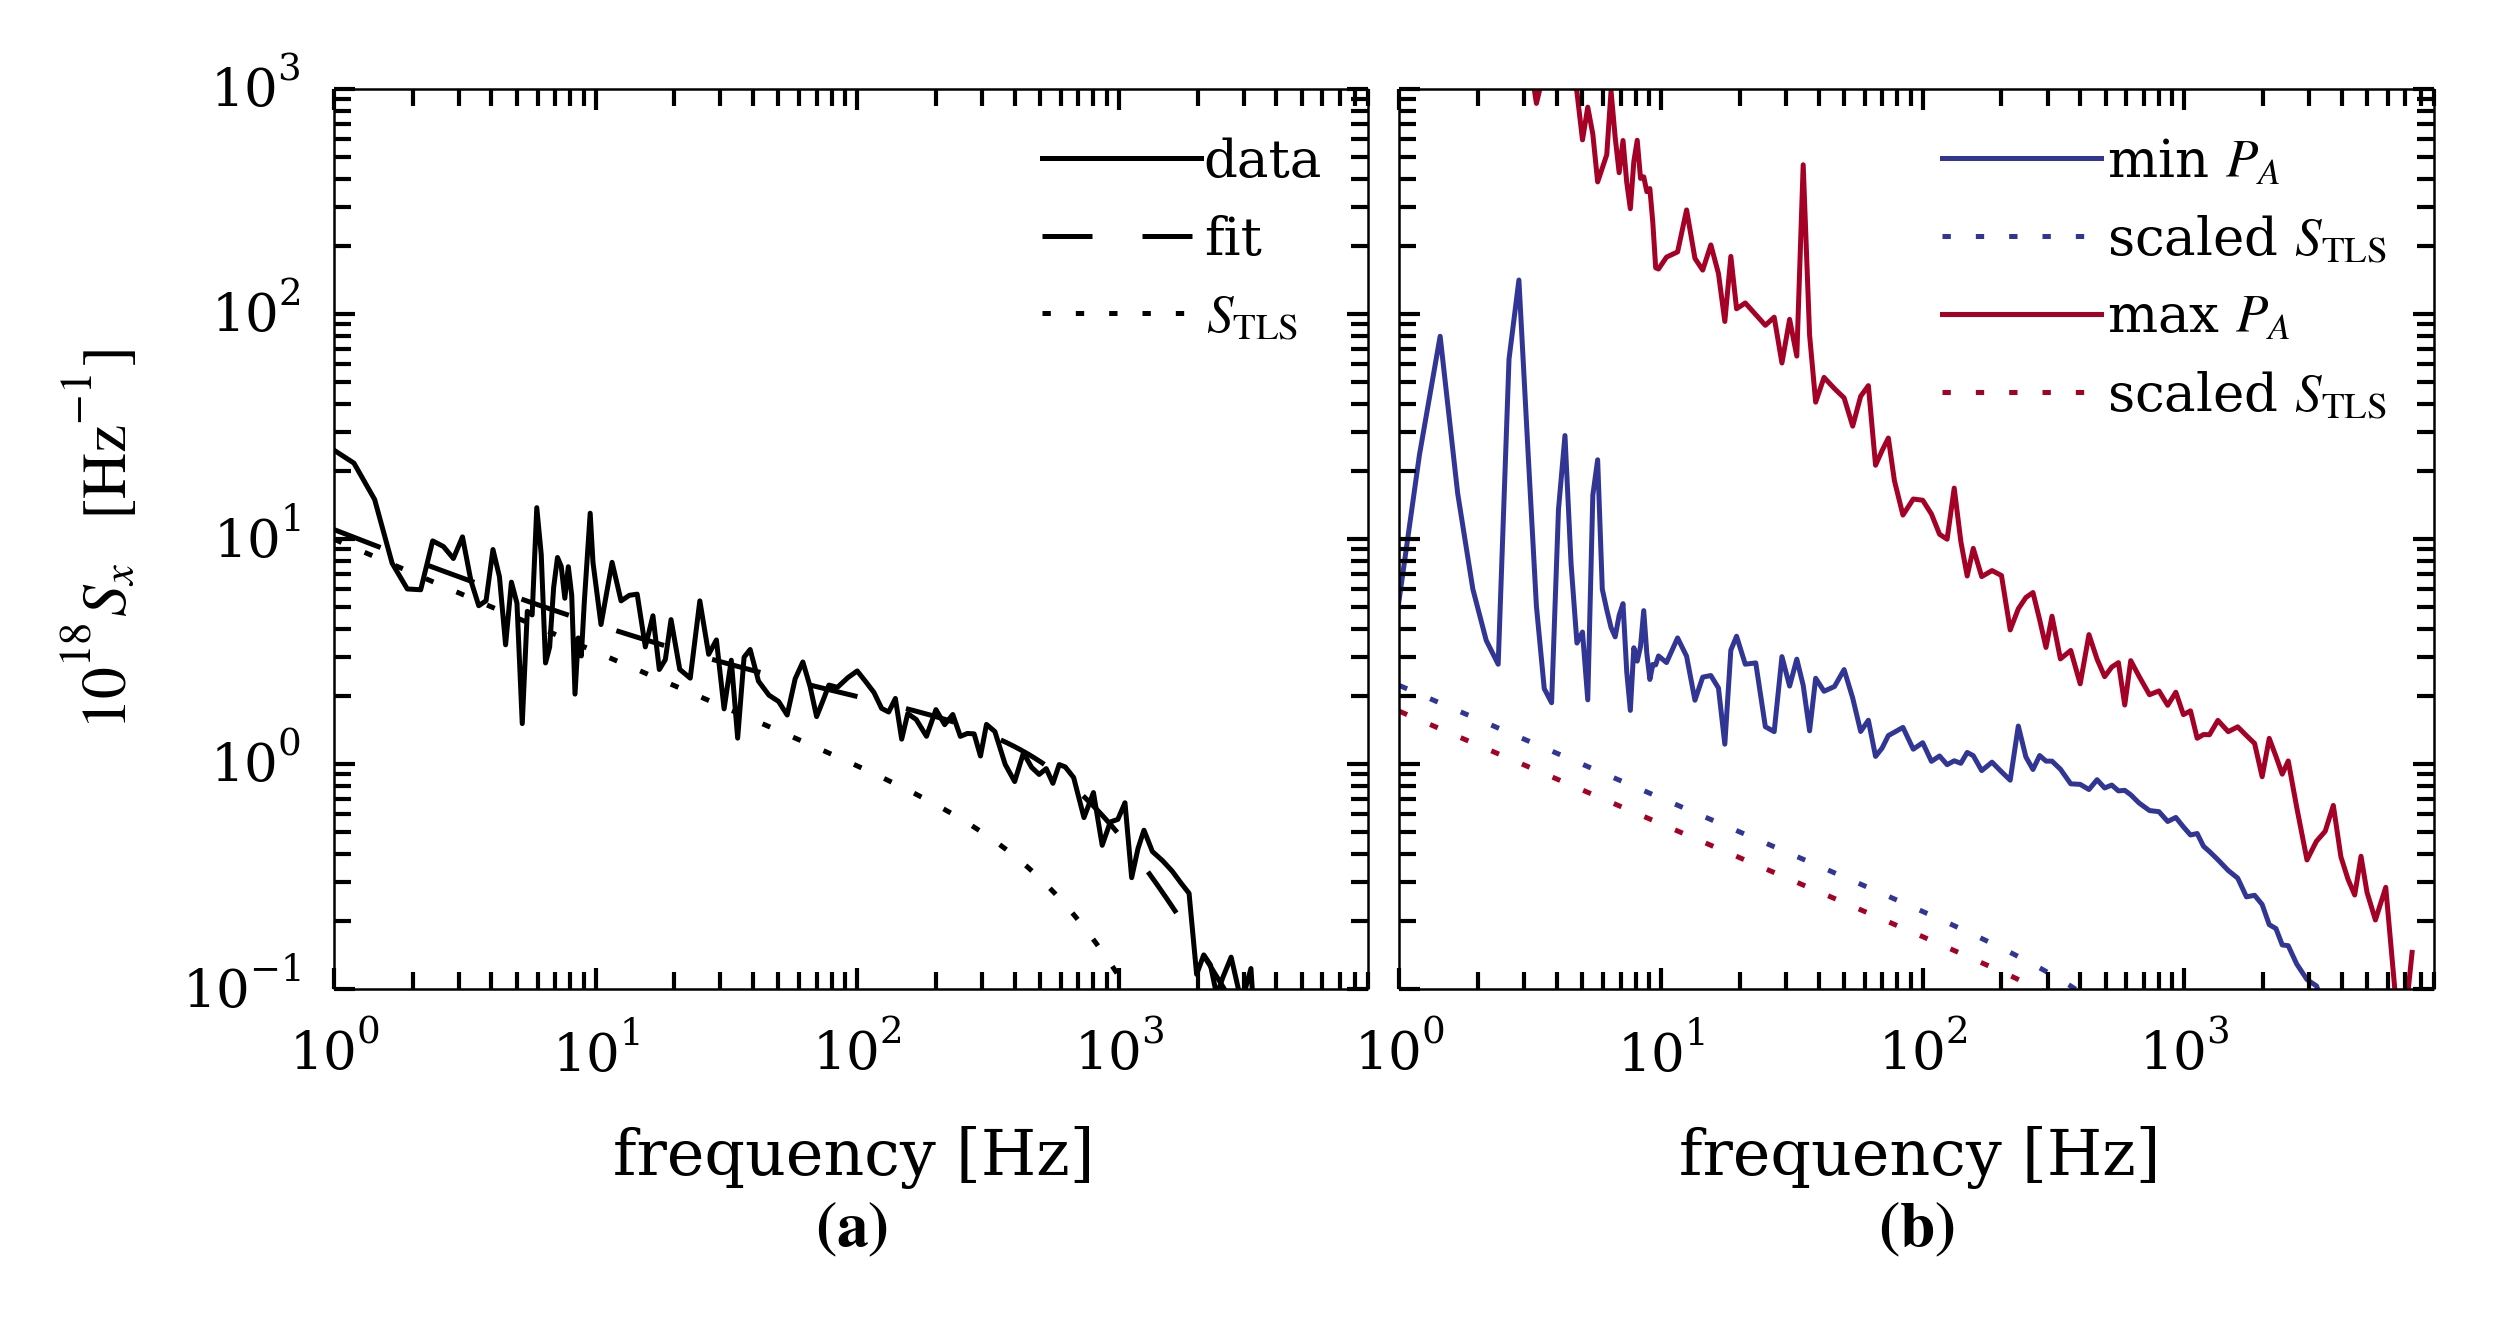

In [13]:
dark_color = 'black'
xlimits = (1e0, 0.9e4)
ylimits = (1e-1, 1e3)

with plt.rc_context({'figure.subplot.wspace': 0.03}):
    fig, (dark_ax, light_ax)  = plt.subplots(ncols=2, figsize=(5, 2))
    
    # Plot dark data
    dark_ax.loglog(off.pca_freq,
                   Sx_scale * (off.pca_eigvals[1] -
                               off.noise_fit_amplifier_noise),
                   '-', color=dark_color, label='data')

    dark_ax.loglog(ff,
                   Sx_scale * ((A_device * off.noise_fit_device_noise /
                                (1 + (ff / off.noise_fit_fc)**2)) +
#                               off.noise_fit_amplifier_noise +
                               S_TLS),
                   '--', color=dark_color, label='fit')
    
    dark_ax.loglog(ff,
                   Sx_scale * S_TLS,
                   ':', color=dark_color, label='$S_\mathrm{TLS}$')


    # Plot light data
    light_ax.loglog(cw_minimum_power_row.pca_freq,
                    Sx_scale * (cw_minimum_power_row.pca_eigvals[1] -
                                cw_minimum_power_row.noise_fit_amplifier_noise),
                    '-', color=mappable_cw.to_rgba(cw_minimum_power_row.source_power),
                    label='min $P_A$')

    light_ax.loglog(ff,
                    Sx_scale * (cw_minimum_power_row.A_TLS * ff**(-1/2) /
                                (1 + (ff / cw_minimum_power_row.noise_fit_fc)**2)),
                    ':', color=mappable_cw.to_rgba(cw_minimum_power_row.source_power),
                    label='scaled $S_\mathrm{TLS}$')

    light_ax.loglog(cw_maximum_power_row.pca_freq,
                    Sx_scale * (cw_maximum_power_row.pca_eigvals[1] -
                                cw_maximum_power_row.noise_fit_amplifier_noise),
                    '-', color=mappable_cw.to_rgba(cw_maximum_power_row.source_power),
                    label='max $P_A$')

    light_ax.loglog(ff,
                    Sx_scale * (cw_maximum_power_row.A_TLS * ff**(-1/2) /
                                (1 + (ff / cw_maximum_power_row.noise_fit_fc)**2)),
                    ':', color=mappable_cw.to_rgba(cw_maximum_power_row.source_power),
                    label='scaled $S_\mathrm{TLS}$')
    
dark_ax.set_ylabel('$10^{18} S_x \; [\mathrm{Hz}^{-1}]$')
dark_ax.set_xlabel('frequency [Hz]\n'  + r'${\bf(a)}$')
dark_ax.legend(loc='upper right')
dark_ax.set_xlim(*xlimits)
dark_ax.set_ylim(*ylimits)

light_ax.set_xlabel('frequency [Hz]\n'  + r'${\bf(b)}$')
light_ax.legend(loc='upper right', fontsize='xx-small')
light_ax.set_xlim(*xlimits)
light_ax.set_ylim(*ylimits)
light_ax.set_yticklabels([]);

fig.savefig('dark_and_light_noise_minus_amp_two_panel.pdf')
fig.savefig('dark_and_light_noise_minus_amp_two_panel.eps')

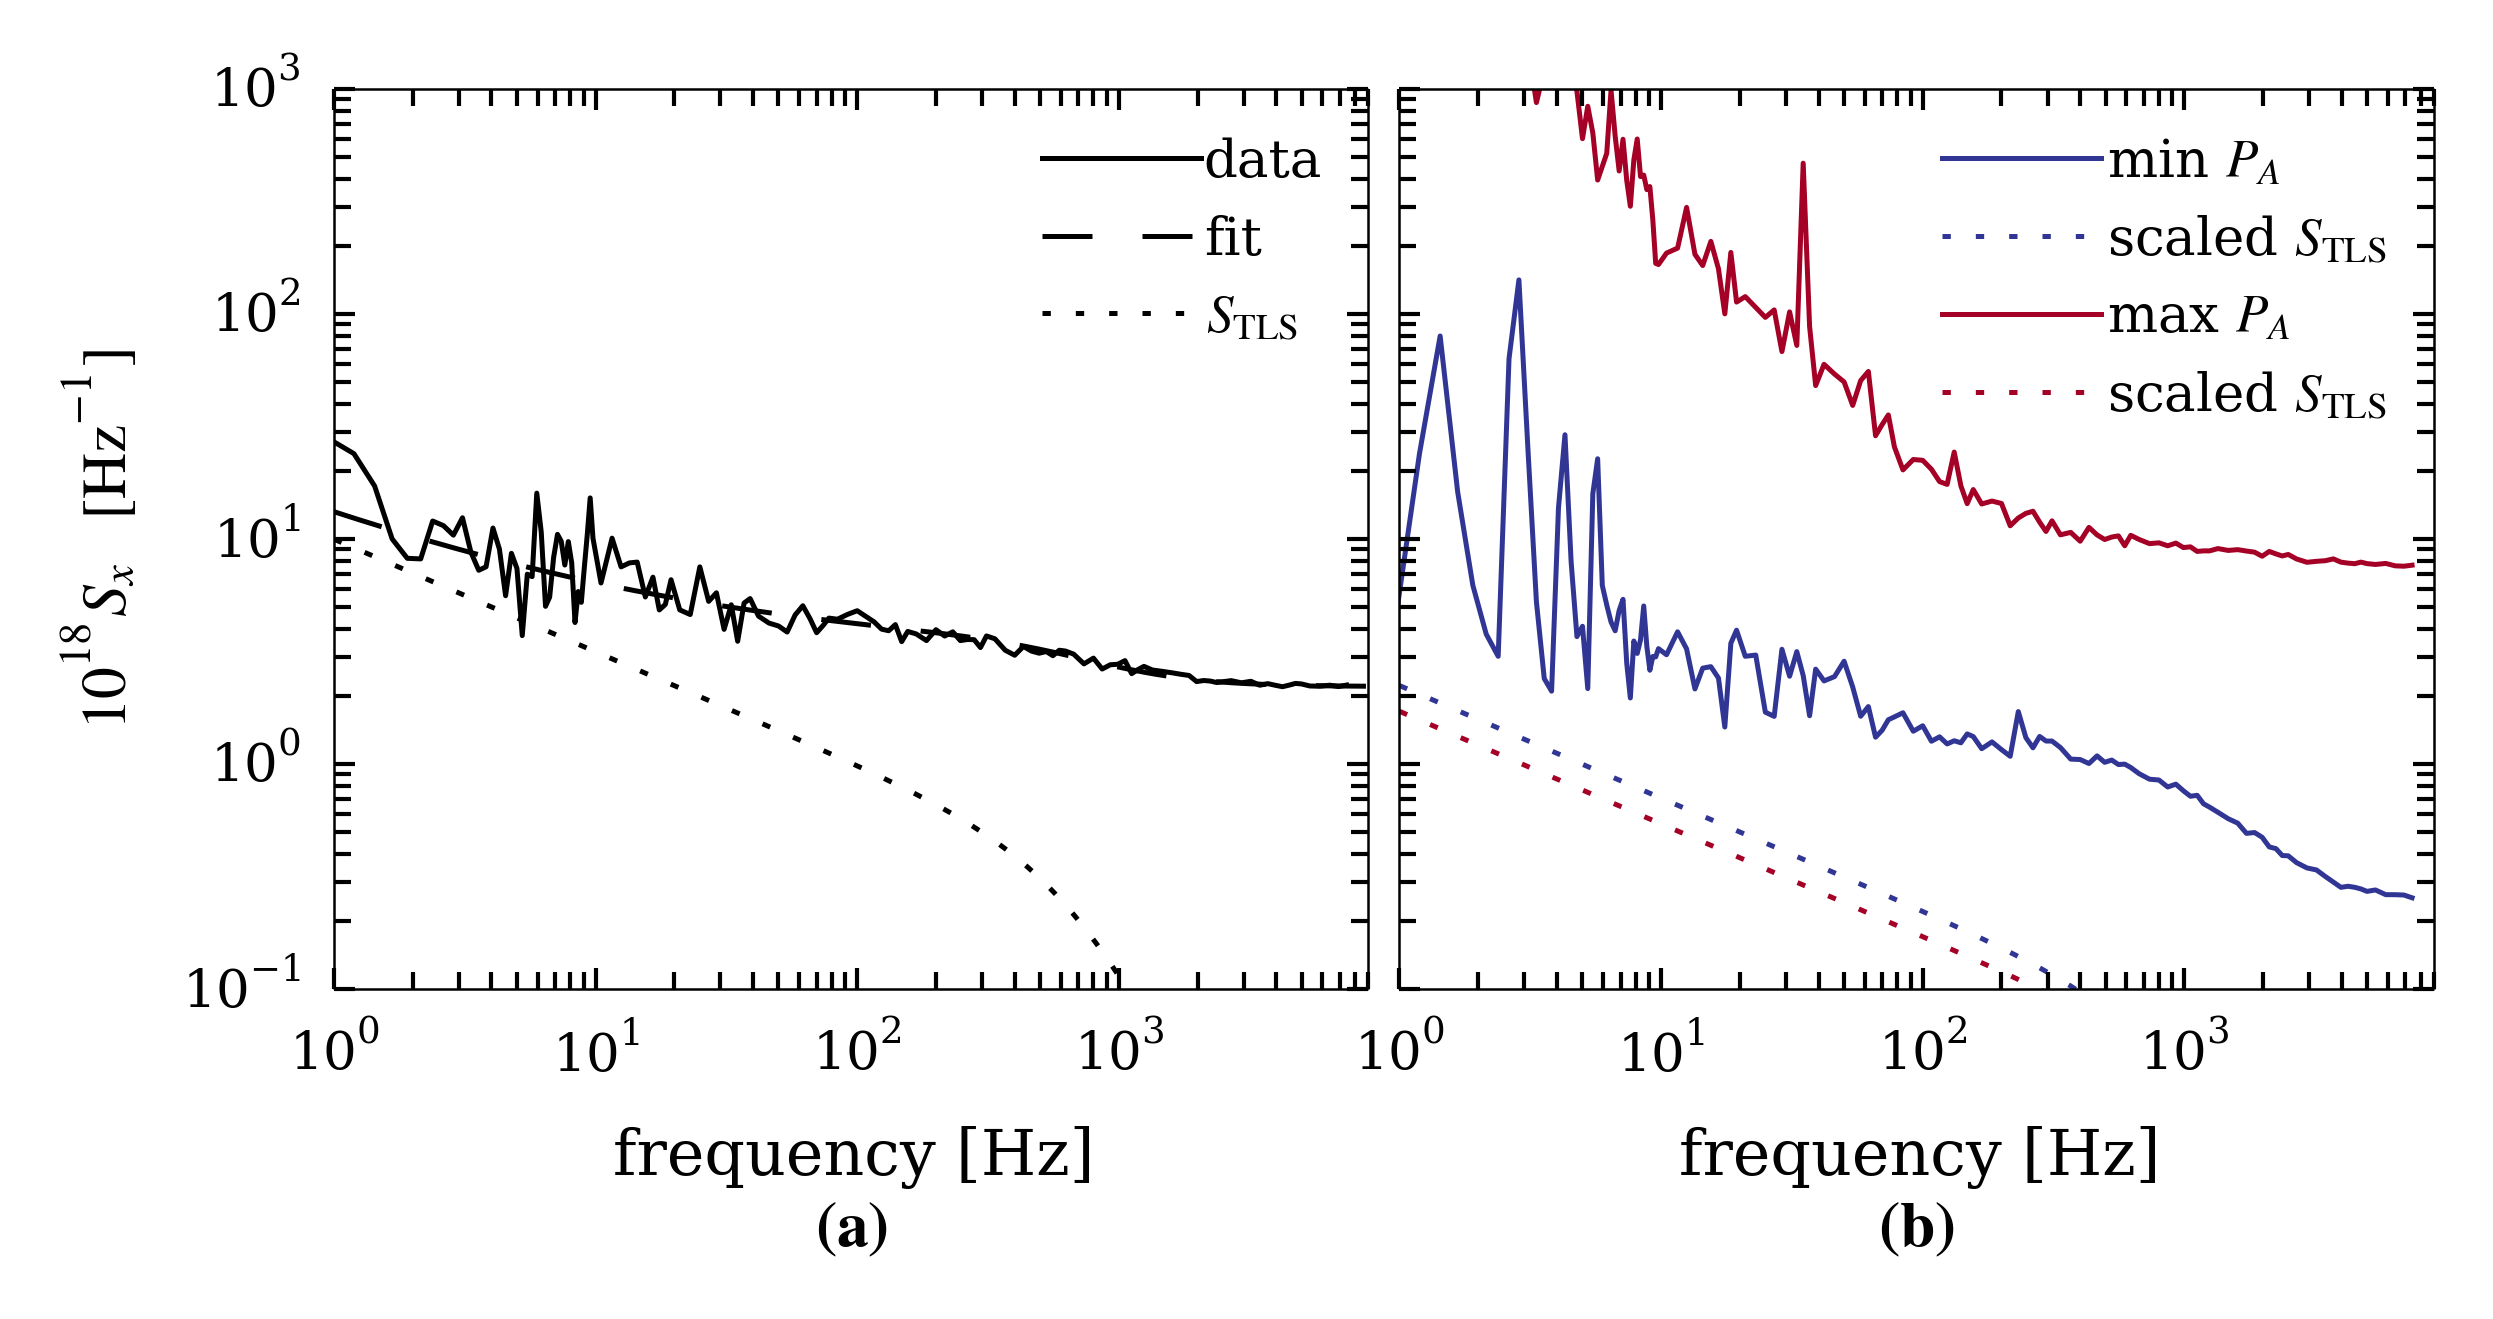

In [14]:
dark_color = 'black'
xlimits = (1e0, 0.9e4)
ylimits = (1e-1, 1e3)

with plt.rc_context({'figure.subplot.wspace': 0.03}):
    fig, (dark_ax, light_ax)  = plt.subplots(ncols=2, figsize=(5, 2))
    
    # Plot dark data
    dark_ax.loglog(off.pca_freq,
                   Sx_scale * off.pca_eigvals[1],
                   '-', color=dark_color, label='data')

    dark_ax.loglog(ff,
                   Sx_scale * ((A_device * off.noise_fit_device_noise /
                                (1 + (ff / off.noise_fit_fc)**2)) +
                               off.noise_fit_amplifier_noise +
                               S_TLS),
                   '--', color=dark_color, label='fit')
    
    dark_ax.loglog(ff,
                   Sx_scale * S_TLS,
                   ':', color=dark_color, label='$S_\mathrm{TLS}$')


    # Plot light data
    light_ax.loglog(cw_minimum_power_row.pca_freq,
                    Sx_scale * cw_minimum_power_row.pca_eigvals[1],
                    '-', color=mappable_cw.to_rgba(cw_minimum_power_row.source_power),
                    label='min $P_A$')

    light_ax.loglog(ff,
                    Sx_scale * (cw_minimum_power_row.A_TLS * ff**(-1/2) /
                                (1 + (ff / cw_minimum_power_row.noise_fit_fc)**2)),
                    ':', color=mappable_cw.to_rgba(cw_minimum_power_row.source_power),
                    label='scaled $S_\mathrm{TLS}$')

    light_ax.loglog(cw_maximum_power_row.pca_freq,
                    Sx_scale * cw_maximum_power_row.pca_eigvals[1],
                    '-', color=mappable_cw.to_rgba(cw_maximum_power_row.source_power),
                    label='max $P_A$')

    light_ax.loglog(ff,
                    Sx_scale * (cw_maximum_power_row.A_TLS * ff**(-1/2) /
                                (1 + (ff / cw_maximum_power_row.noise_fit_fc)**2)),
                    ':', color=mappable_cw.to_rgba(cw_maximum_power_row.source_power),
                    label='scaled $S_\mathrm{TLS}$')
    
dark_ax.set_ylabel('$10^{18} S_x \; [\mathrm{Hz}^{-1}]$')
dark_ax.set_xlabel('frequency [Hz]\n'  + r'${\bf(a)}$')
dark_ax.legend(loc='upper right')
dark_ax.set_xlim(*xlimits)
dark_ax.set_ylim(*ylimits)

light_ax.set_xlabel('frequency [Hz]\n'  + r'${\bf(b)}$')
light_ax.legend(loc='upper right', fontsize='xx-small')
light_ax.set_xlim(*xlimits)
light_ax.set_ylim(*ylimits)
light_ax.set_yticklabels([]);

fig.savefig('dark_and_light_noise_two_panel.pdf')
fig.savefig('dark_and_light_noise_two_panel.eps')

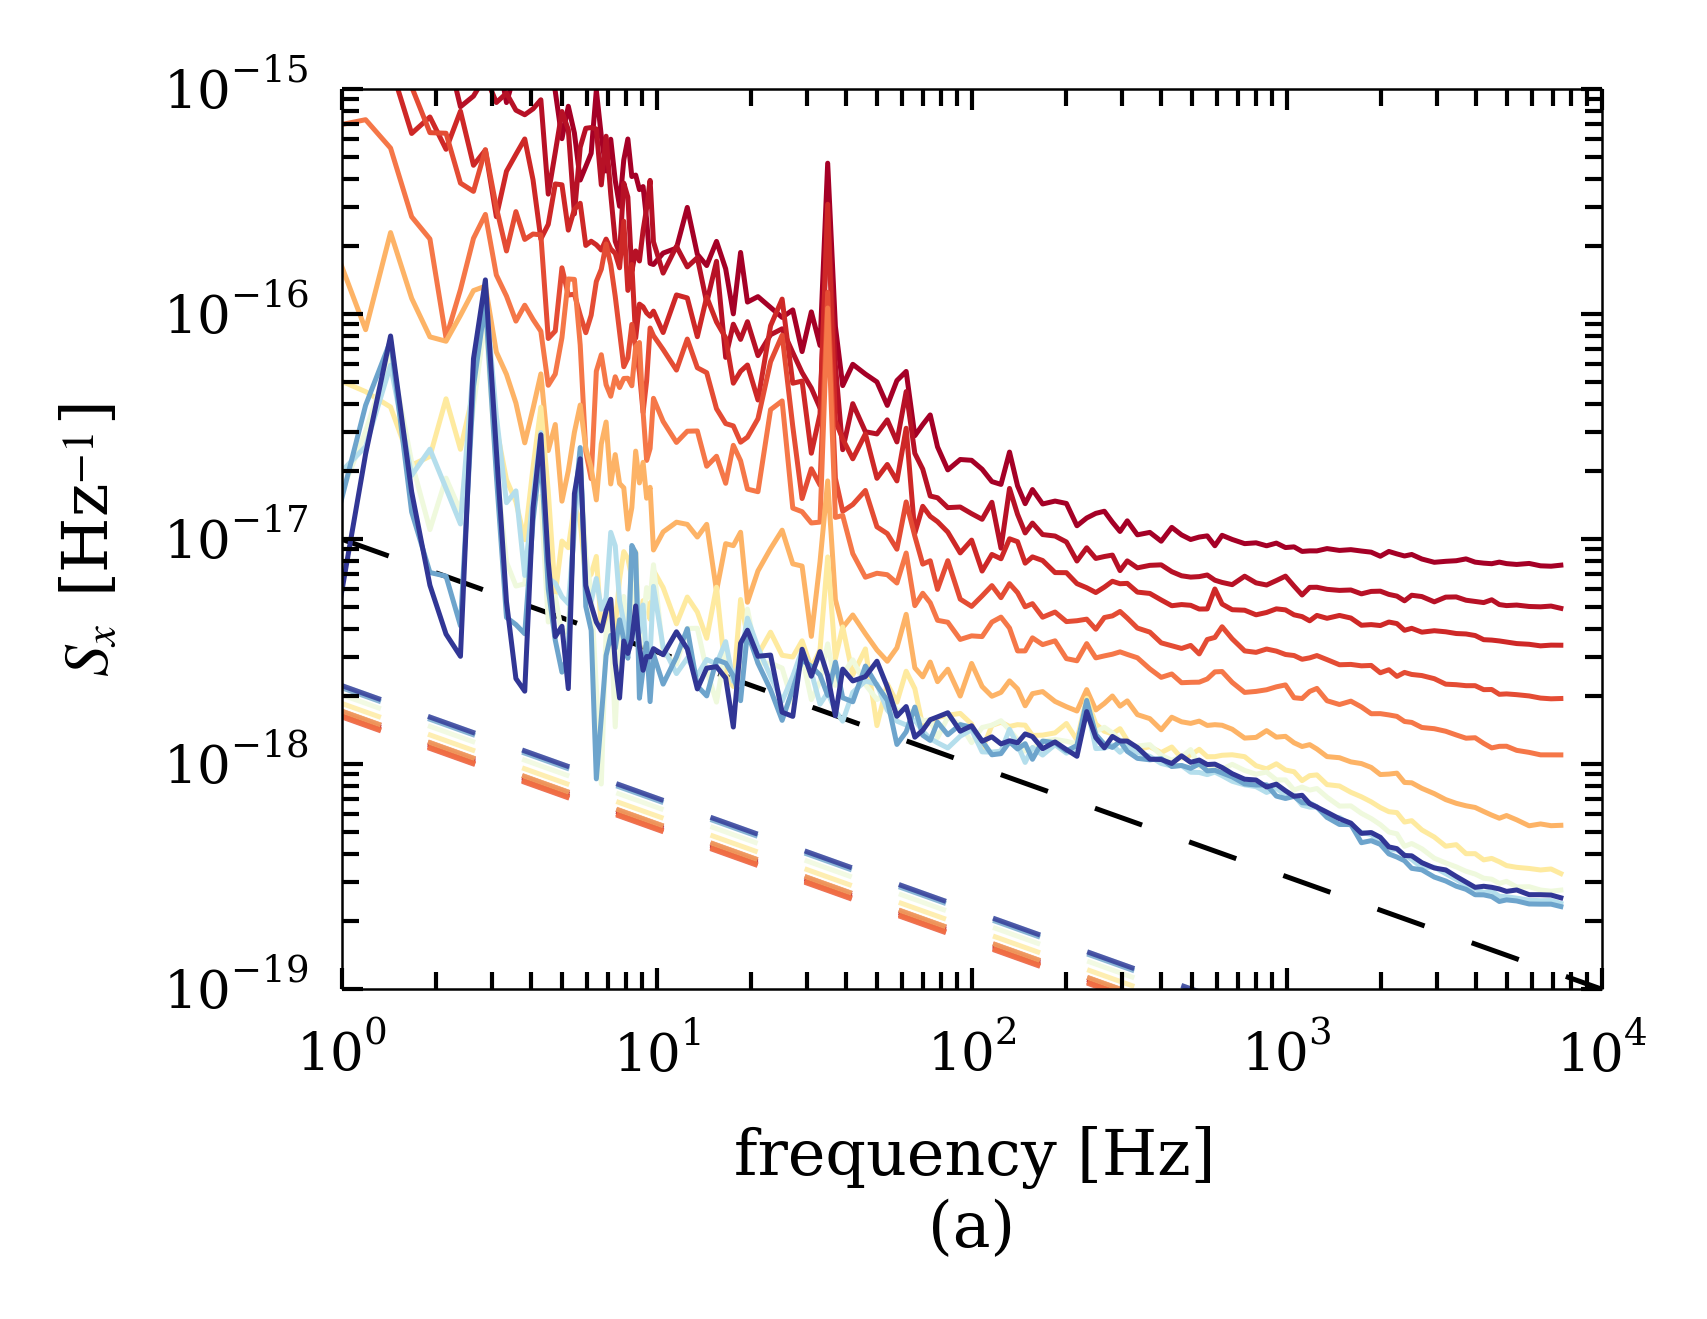

In [12]:
fig, ax = plt.subplots()
ax.loglog(ff, A_TLS * ff**(-1/2), '--k', label='dark TLS')

for index, row in cw.iterrows():
    ax.loglog(row.pca_freq,
              row.pca_eigvals[1],
              color=mappable_cw.to_rgba(row.source_power))
#                 label=float_to_latex(eta_cw * row.source_power))
    """
    ax.loglog(row.pca_freq,
             (row.noise_fit_device_noise / (1 + (row.pca_freq / row.noise_fit_fc)**2) +
                              row.noise_fit_amplifier_noise),
             '--', color=mappable_cw.to_rgba(row.source_power))
    """
    ax.loglog(row.pca_freq,
              row.A_TLS * row.pca_freq**(-1/2),
              '--', color=mappable_cw.to_rgba(row.source_power), alpha=0.8)
ax.set_xlabel("frequency [Hz]\n(a)")
ax.set_ylabel("$S_x$ [Hz$^{-1}$]")
ax.set_xlim(1e0, 1e4)
ax.set_ylim(1e-19, 1e-15);